# Numpy

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures (arrays) for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` we need to import symbols from the module:

In [3]:
from numpy import *

## Creating numpy arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [4]:
v = array([1, 2, 3, 4])
M = array([[1, 2], [3, 4]])
v, M

(array([1, 2, 3, 4]), array([[1, 2],
        [3, 4]]))

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [6]:
v.shape, M.shape

((4,), (2, 2))

In [7]:
v.size, M.size

(4, 4)

In [8]:
shape(v), shape(M)

((4,), (2, 2))

In [9]:
size(v), size(M)

(4, 4)

Why use new array type `numpy.ndarray`?

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [10]:
M.dtype

dtype('int64')

In [11]:
M[0, 0] = "hello"

ValueError: invalid literal for long() with base 10: 'hello'

In [ ]:
M = array([[1, 2], [3, 4]], dtype=complex)

In [ ]:
M.dtype

In [ ]:
M

Common type that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

In [ ]:
M.itemsize # bytes per element

In [ ]:
M.nbytes # total number of bytes

In [ ]:
M.ndim # number of dimensions

### Using array-generating functions

#### arange

In [ ]:
# syntax: arange(start, end, step), end is excluded
x = arange(0, 10, 1)
x

In [ ]:
x = arange(-5, 1.5, 0.2)
x

#### linspace and logspace

In [ ]:
# syntax: linspace(start, end, number of points), end is included
linspace(0, 10, 13)

In [ ]:
logspace(0, 10, 11, base = e)

#### mgrid

In [ ]:
# similar to meshgrid in MATLAB
x, y = mgrid[0:5, 0:5]

In [ ]:
x

In [ ]:
y

#### random data

In [ ]:
from numpy import random # useless because we imported all from numpy

In [ ]:
# uniform random numbers in [0, 1]
rand(5, 4)

In [ ]:
# standard normal distributed random numbers
rand(5, 4)

#### diag

In [12]:
diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [13]:
# diagonal with offset from the main diagonal
diag([1, 2, 3], k = 1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [14]:
diag([1, 2, 3], k = -2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0]])

In [15]:
M = rand(4, 4)

In [16]:
diagonal(M)

array([ 0.61384556,  0.5033794 ,  0.82025237,  0.85738264])

In [17]:
diag(M)

array([ 0.61384556,  0.5033794 ,  0.82025237,  0.85738264])

In [18]:
diag(M, -1)

array([ 0.29705702,  0.61968992,  0.79607283])

In [19]:
diag(diag(M))

array([[ 0.61384556,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.5033794 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.82025237,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.85738264]])

#### zeros and ones

In [20]:
zeros((3, 2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [21]:
I = ones((5, 3))

In [22]:
I.size

15

In [23]:
I.shape

(5, 3)

In [24]:
I

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [25]:
eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## File I/O

### Comma-separated values (CSV), Tab-separated values (TSV)

To read data from such file into Numpy arrays we can use the `numpy.genfromtxt` function:

In [26]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [27]:
data = genfromtxt('stockholm_td_adj.dat')
data

array([[  1.80000000e+03,   1.00000000e+00,   1.00000000e+00, ...,
         -6.10000000e+00,  -6.10000000e+00,   1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   2.00000000e+00, ...,
         -1.54000000e+01,  -1.54000000e+01,   1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   3.00000000e+00, ...,
         -1.50000000e+01,  -1.50000000e+01,   1.00000000e+00],
       ..., 
       [  2.01100000e+03,   1.20000000e+01,   2.90000000e+01, ...,
          4.20000000e+00,   4.20000000e+00,   1.00000000e+00],
       [  2.01100000e+03,   1.20000000e+01,   3.00000000e+01, ...,
         -1.00000000e-01,  -1.00000000e-01,   1.00000000e+00],
       [  2.01100000e+03,   1.20000000e+01,   3.10000000e+01, ...,
         -3.30000000e+00,  -3.30000000e+00,   1.00000000e+00]])

In [28]:
data.shape

(77431, 7)

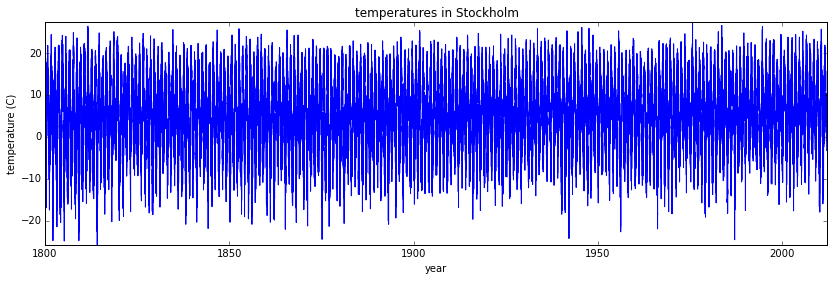

In [29]:
fig, ax = subplots(figsize=(14, 4))
ax.plot(data[:, 0] + data[:, 1]/12.0 + data[:, 2]/365, data[:, 5])
ax.axis('tight')
ax.set_title('temperatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [30]:
savetxt("random-matrix.txt", rand(4, 5))

In [31]:
!cat random-matrix.txt

6.482012459232142643e-01 6.769103055344036779e-01 8.840524892474093122e-01 6.229205334202712052e-01 9.213109415559337378e-01
7.336766548573012692e-01 6.491870114128105440e-01 9.439666686379755145e-02 9.463023108683067397e-01 8.382071576848071359e-02
4.414880547743732508e-01 8.054139697169753198e-01 6.815222849703149732e-01 3.852399535970862932e-01 4.695995962874178753e-01
4.761338831918624503e-01 7.742899790050826736e-01 6.354803235928102589e-01 3.743970878371249977e-01 4.541445709238488559e-01


In [32]:
savetxt("random-matrix.txt", M, fmt='%.5f', delimiter = '\t') # fmt specifies the format

In [33]:
!cat random-matrix.txt

0.61385	0.92665	0.52861	0.57368
0.29706	0.50338	0.72882	0.82885
0.32203	0.61969	0.82025	0.45851
0.09345	0.59080	0.79607	0.85738


### Numpy's native file format

In [34]:
save("random-matrix.npy", rand(6,4))

In [35]:
!file random-matrix.npy

random-matrix.npy: data


In [36]:
load("random-matrix.npy")

array([[ 0.61320782,  0.72368406,  0.67139572,  0.94845858],
       [ 0.08241615,  0.6317613 ,  0.47977149,  0.71459898],
       [ 0.82280107,  0.45338242,  0.92470701,  0.56867882],
       [ 0.55870312,  0.08384549,  0.83219022,  0.62963646],
       [ 0.73284209,  0.01847033,  0.44341146,  0.21869333],
       [ 0.26342659,  0.67392362,  0.28366417,  0.76440267]])

## Manipulating arrays

### Indexing

In [37]:
v[2]

3

In [38]:
M[1,1]

0.50337939901577344

In [39]:
M

array([[ 0.61384556,  0.92664748,  0.52861084,  0.57368126],
       [ 0.29705702,  0.5033794 ,  0.72882382,  0.82884805],
       [ 0.32203429,  0.61968992,  0.82025237,  0.45851259],
       [ 0.09345011,  0.59080066,  0.79607283,  0.85738264]])

In [40]:
M[1]

array([ 0.29705702,  0.5033794 ,  0.72882382,  0.82884805])

In [41]:
R = rand(5, 4)

In [42]:
R

array([[ 0.39041346,  0.5004753 ,  0.71481635,  0.86151752],
       [ 0.10983402,  0.28342   ,  0.97379452,  0.44988316],
       [ 0.28872616,  0.66087683,  0.16563567,  0.50037286],
       [ 0.55040783,  0.88477721,  0.63978468,  0.10833731],
       [ 0.10882081,  0.90493595,  0.66240357,  0.74923219]])

In [43]:
R[2, :]

array([ 0.28872616,  0.66087683,  0.16563567,  0.50037286])

In [44]:
R[:, 1]

array([ 0.5004753 ,  0.28342   ,  0.66087683,  0.88477721,  0.90493595])

We can assign new values to elements in an array using indexing:

In [45]:
R[2, 0] = 1

In [46]:
R

array([[ 0.39041346,  0.5004753 ,  0.71481635,  0.86151752],
       [ 0.10983402,  0.28342   ,  0.97379452,  0.44988316],
       [ 1.        ,  0.66087683,  0.16563567,  0.50037286],
       [ 0.55040783,  0.88477721,  0.63978468,  0.10833731],
       [ 0.10882081,  0.90493595,  0.66240357,  0.74923219]])

In [47]:
R[:, 1] = pi

In [48]:
R

array([[ 0.39041346,  3.14159265,  0.71481635,  0.86151752],
       [ 0.10983402,  3.14159265,  0.97379452,  0.44988316],
       [ 1.        ,  3.14159265,  0.16563567,  0.50037286],
       [ 0.55040783,  3.14159265,  0.63978468,  0.10833731],
       [ 0.10882081,  3.14159265,  0.66240357,  0.74923219]])

In [49]:
R[0, :] = [1, 2, 3, 4]

In [50]:
R

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.10983402,  3.14159265,  0.97379452,  0.44988316],
       [ 1.        ,  3.14159265,  0.16563567,  0.50037286],
       [ 0.55040783,  3.14159265,  0.63978468,  0.10833731],
       [ 0.10882081,  3.14159265,  0.66240357,  0.74923219]])

### Index slicing

In [51]:
R = rand(6, 4)
R

array([[ 0.5462138 ,  0.8887045 ,  0.23887062,  0.00350222],
       [ 0.70051612,  0.18852991,  0.13186015,  0.29345871],
       [ 0.468932  ,  0.8389684 ,  0.51224333,  0.10953583],
       [ 0.57353752,  0.36916627,  0.69928908,  0.0945868 ],
       [ 0.54913968,  0.82294921,  0.21145861,  0.03295145],
       [ 0.90133396,  0.37357354,  0.7520096 ,  0.94077788]])

In [52]:
R[1:3]

array([[ 0.70051612,  0.18852991,  0.13186015,  0.29345871],
       [ 0.468932  ,  0.8389684 ,  0.51224333,  0.10953583]])

In [53]:
R[::2, ::2]

array([[ 0.5462138 ,  0.23887062],
       [ 0.468932  ,  0.51224333],
       [ 0.54913968,  0.21145861]])

In [54]:
R[:-1]

array([[ 0.5462138 ,  0.8887045 ,  0.23887062,  0.00350222],
       [ 0.70051612,  0.18852991,  0.13186015,  0.29345871],
       [ 0.468932  ,  0.8389684 ,  0.51224333,  0.10953583],
       [ 0.57353752,  0.36916627,  0.69928908,  0.0945868 ],
       [ 0.54913968,  0.82294921,  0.21145861,  0.03295145]])

In [55]:
R[:,-1]

array([ 0.00350222,  0.29345871,  0.10953583,  0.0945868 ,  0.03295145,
        0.94077788])

In [56]:
R[:, -3:]

array([[ 0.8887045 ,  0.23887062,  0.00350222],
       [ 0.18852991,  0.13186015,  0.29345871],
       [ 0.8389684 ,  0.51224333,  0.10953583],
       [ 0.36916627,  0.69928908,  0.0945868 ],
       [ 0.82294921,  0.21145861,  0.03295145],
       [ 0.37357354,  0.7520096 ,  0.94077788]])

In [57]:
R[1:3, 1:4]

array([[ 0.18852991,  0.13186015,  0.29345871],
       [ 0.8389684 ,  0.51224333,  0.10953583]])

In [58]:
R[::2, ::2] = 1
R

array([[ 1.        ,  0.8887045 ,  1.        ,  0.00350222],
       [ 0.70051612,  0.18852991,  0.13186015,  0.29345871],
       [ 1.        ,  0.8389684 ,  1.        ,  0.10953583],
       [ 0.57353752,  0.36916627,  0.69928908,  0.0945868 ],
       [ 1.        ,  0.82294921,  1.        ,  0.03295145],
       [ 0.90133396,  0.37357354,  0.7520096 ,  0.94077788]])

### Indexing using array or list

In [59]:
row_indices = [0, 1, 4]
R[row_indices]

array([[ 1.        ,  0.8887045 ,  1.        ,  0.00350222],
       [ 0.70051612,  0.18852991,  0.13186015,  0.29345871],
       [ 1.        ,  0.82294921,  1.        ,  0.03295145]])

In [60]:
R = rand(7, 4)
R

array([[ 0.59698887,  0.99791864,  0.8411744 ,  0.86974821],
       [ 0.92439711,  0.79497956,  0.17131705,  0.34404413],
       [ 0.26727946,  0.07108826,  0.89273803,  0.01490446],
       [ 0.91238964,  0.7179528 ,  0.11208056,  0.59413981],
       [ 0.26084817,  0.74526117,  0.67511718,  0.73570332],
       [ 0.72485647,  0.5270029 ,  0.33786175,  0.08448468],
       [ 0.12809035,  0.0954366 ,  0.75576531,  0.63206552]])

In [61]:
R[:,[1, 0, -1]]

array([[ 0.99791864,  0.59698887,  0.86974821],
       [ 0.79497956,  0.92439711,  0.34404413],
       [ 0.07108826,  0.26727946,  0.01490446],
       [ 0.7179528 ,  0.91238964,  0.59413981],
       [ 0.74526117,  0.26084817,  0.73570332],
       [ 0.5270029 ,  0.72485647,  0.08448468],
       [ 0.0954366 ,  0.12809035,  0.63206552]])

### Indexing using mask

In [62]:
mask = R > pi/6
mask

array([[ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False,  True, False],
       [ True,  True, False,  True],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [False, False,  True,  True]], dtype=bool)

In [63]:
R[mask]

array([ 0.59698887,  0.99791864,  0.8411744 ,  0.86974821,  0.92439711,
        0.79497956,  0.89273803,  0.91238964,  0.7179528 ,  0.59413981,
        0.74526117,  0.67511718,  0.73570332,  0.72485647,  0.5270029 ,
        0.75576531,  0.63206552])

In [64]:
array([1, 2, 3]) + 6

array([7, 8, 9])

## Functions for extracting data from arrays and creating arrays

### where

Used for converting index mask to index array.

In [65]:
indices = where(mask)

In [66]:
R[indices] == R[mask]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

### take

Takes elements with given indices from list or `ndarray` treating `ndarray` like one dimensional array.

In [67]:
P = array([arange(1,10) + i for i in range(10)])
P

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [10, 11, 12, 13, 14, 15, 16, 17, 18]])

In [68]:
P[[1, 3, 4], :][:, [2, 5]]

array([[ 4,  7],
       [ 6,  9],
       [ 7, 10]])

In [69]:
mask = P % 2 == 0

In [70]:
P[mask]

array([ 2,  4,  6,  8,  2,  4,  6,  8, 10,  4,  6,  8, 10,  4,  6,  8, 10,
       12,  6,  8, 10, 12,  6,  8, 10, 12, 14,  8, 10, 12, 14,  8, 10, 12,
       14, 16, 10, 12, 14, 16, 10, 12, 14, 16, 18])

In [71]:
indices = where(mask)
indices

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5,
        5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9]),
 array([1, 3, 5, 7, 0, 2, 4, 6, 8, 1, 3, 5, 7, 0, 2, 4, 6, 8, 1, 3, 5, 7, 0,
        2, 4, 6, 8, 1, 3, 5, 7, 0, 2, 4, 6, 8, 1, 3, 5, 7, 0, 2, 4, 6, 8]))

In [72]:
P.take(([1, 2, 3], [4, 5, 6], [9, 10, 11]))

array([[2, 3, 4],
       [5, 6, 7],
       [2, 3, 4]])

### choose

Constructs array by picking elements form several arrays:

In [73]:
which = [0, 1, 2, 1, 1, 2, 2, 0]

In [74]:
array1 = array([x for x in range(8)])
array2 = logspace(1, 4, 8)
array3 = linspace(-8, 100, 8)
choices = [array1, array2, array3]
choose(which, choices)

array([   0.        ,   26.82695795,   22.85714286,  193.06977289,
        517.94746792,   69.14285714,   84.57142857,    7.        ])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar - array operations

In [75]:
v1 = arange(12, 17)
v1

array([12, 13, 14, 15, 16])

In [76]:
v1 * 2 

array([24, 26, 28, 30, 32])

In [77]:
v1 + 2 

array([14, 15, 16, 17, 18])

In [78]:
v1 / 3.5

array([ 3.42857143,  3.71428571,  4.        ,  4.28571429,  4.57142857])

In [79]:
v1 % 3

array([0, 1, 2, 0, 1])

In [80]:
v1 // 3

array([4, 4, 4, 5, 5])

In [81]:
v1 ** 3

array([1728, 2197, 2744, 3375, 4096])

### Elementwise array - array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [82]:
I = eye(4)
E = ones((4, 4))

In [83]:
print(I)
print(E)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [84]:
I * E

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [85]:
v2 = linspace(2, 7, 4)
print(v2)
print(E*v2)
print(I*v2)

[ 2.          3.66666667  5.33333333  7.        ]
[[ 2.          3.66666667  5.33333333  7.        ]
 [ 2.          3.66666667  5.33333333  7.        ]
 [ 2.          3.66666667  5.33333333  7.        ]
 [ 2.          3.66666667  5.33333333  7.        ]]
[[ 2.          0.          0.          0.        ]
 [ 0.          3.66666667  0.          0.        ]
 [ 0.          0.          5.33333333  0.        ]
 [ 0.          0.          0.          7.        ]]


### Matrix algebra

There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments:

In [86]:
dot(I, E)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [87]:
dot(E, E)

array([[ 4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.]])

In [88]:
dot(I, v2)

array([ 2.        ,  3.66666667,  5.33333333,  7.        ])

In [89]:
dot(E, v2)

array([ 18.,  18.,  18.,  18.])

In [90]:
dot(v2, v2)

94.8888888888889

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [91]:
IM = matrix(I)
EM = matrix(E)
v2M = matrix(v2).T

In [92]:
type(v2M)

numpy.matrixlib.defmatrix.matrix

In [93]:
IM * EM

matrix([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])

In [94]:
IM * v2M

matrix([[ 2.        ],
        [ 3.66666667],
        [ 5.33333333],
        [ 7.        ]])

In [95]:
v2M + EM * v2M

matrix([[ 20.        ],
        [ 21.66666667],
        [ 23.33333333],
        [ 25.        ]])

In [96]:
R = matrix(rand(4, 4))
print(R)

[[ 0.31660623  0.95222532  0.90773875  0.03455377]
 [ 0.38679885  0.8655016   0.68476138  0.76755406]
 [ 0.80513842  0.05954922  0.83282075  0.97975937]
 [ 0.15186154  0.32669732  0.39862663  0.02536898]]


In [97]:
print(R.T)

[[ 0.31660623  0.38679885  0.80513842  0.15186154]
 [ 0.95222532  0.8655016   0.05954922  0.32669732]
 [ 0.90773875  0.68476138  0.83282075  0.39862663]
 [ 0.03455377  0.76755406  0.97975937  0.02536898]]


In [98]:
R * R.T

matrix([[ 1.83215616,  1.59472179,  1.10145415,  0.7218952 ],
        [ 1.59472179,  1.95674376,  1.68526833,  0.63393311],
        [ 1.10145415,  1.68526833,  2.30531281,  0.49856415],
        [ 0.7218952 ,  0.63393311,  0.49856415,  0.28933984]])

In [99]:
print(kron(IM, EM))

[[ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1. 

In [100]:
x = array([1, 2, 3, 4, 5])
y = 10 * x
print(outer(x, y))

[[ 10  20  30  40  50]
 [ 20  40  60  80 100]
 [ 30  60  90 120 150]
 [ 40  80 120 160 200]
 [ 50 100 150 200 250]]


### Array/Matrix transformations

In [101]:
C = matrix([[1+1j, 2j], [3j, 4+5j]])
print(C)

[[ 1.+1.j  0.+2.j]
 [ 0.+3.j  4.+5.j]]


In [102]:
conjugate(C)

matrix([[ 1.-1.j,  0.-2.j],
        [ 0.-3.j,  4.-5.j]])

In [103]:
print(C.H)

[[ 1.-1.j  0.-3.j]
 [ 0.-2.j  4.-5.j]]


In [104]:
print(C.T)

[[ 1.+1.j  0.+3.j]
 [ 0.+2.j  4.+5.j]]


In [105]:
real(C)

matrix([[ 1.,  0.],
        [ 0.,  4.]])

In [106]:
imag(C)

matrix([[ 1.,  2.],
        [ 3.,  5.]])

In [107]:
A = angle(C)
A

array([[ 0.78539816,  1.57079633],
       [ 1.57079633,  0.89605538]])

In [108]:
R = abs(C)
R

matrix([[ 1.41421356,  2.        ],
        [ 3.        ,  6.40312424]])

In [109]:
C1 = multiply(abs(C), cos(A) + 1.0j*sin(A))

In [110]:
abs(C1) - abs(C)

matrix([[ 0.,  0.],
        [ 0.,  0.]])

### Matrix computations

In [111]:
inv(C) # inverse

matrix([[ 0.61320755-0.10377358j, -0.16981132-0.09433962j],
        [-0.25471698-0.14150943j,  0.13207547-0.03773585j]])

In [112]:
C.I

matrix([[ 0.61320755-0.10377358j, -0.16981132-0.09433962j],
        [-0.25471698-0.14150943j,  0.13207547-0.03773585j]])

In [113]:
det(C) # determinant

(5.0000000000000018+9.0000000000000036j)

In [114]:
det(C.I)

(0.04716981132075472-0.084905660377358499j)

In [115]:
det(C.H)

(5.0000000000000018-9.0000000000000036j)

In [116]:
det(C) * det(C.I)

(1.0000000000000004+0j)

### Data processing

In [117]:
data.shape # temeratures in Stockholm

(77431, 7)

In [118]:
mean(data[:, 3])

6.1971096847515854

In [119]:
std(data[:, 3]), var(data[:, 3])

(8.2822716213405734, 68.596023209663414)

In [120]:
data[:, 3].min(), data[:, 3].max()

(-25.800000000000001, 28.300000000000001)

In [121]:
min(data[:, 3])

-25.800000000000001

In [122]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [123]:
sum(d)

45

In [124]:
d.sum()

45

In [125]:
prod(d)

0

In [126]:
prod(d+1)

3628800

In [127]:
cumsum(d) # cumulative sum

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [128]:
cumprod(d+1) # cumulative product

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [129]:
trace(A) # same as diag(A).sum()

1.6814535479687922

In [130]:
trace(diag(d))

45

In [131]:
A.sum()

4.8230462015585855

### Computations on subsets of arrays

In [132]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [133]:
unique(data[:, 1])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [134]:
mask_february = data[:, 1] == 2

In [135]:
mean(data[mask_february, 3])

-3.2121095707365961

In [136]:
months = arange(1, 13)

In [137]:
monthly_mean = [mean(data[data[:, 1] == month, 3]) for month in months]

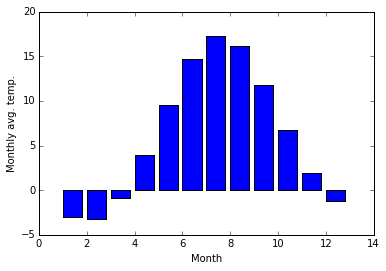

In [138]:
fig, ax = subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

In [139]:
M = rand(4, 4)
M

array([[ 0.29936582,  0.77006185,  0.65031908,  0.38462974],
       [ 0.07708002,  0.98945905,  0.77639833,  0.22215584],
       [ 0.86018971,  0.64757547,  0.51114399,  0.70012985],
       [ 0.97287594,  0.59821487,  0.6830279 ,  0.19453472]])

In [140]:
M.max()

0.98945905432969283

In [141]:
mCol = M.max(axis = 0)
mCol

array([ 0.97287594,  0.98945905,  0.77639833,  0.70012985])

In [142]:
mRow = M.max(axis = 1)
mRow

array([ 0.77006185,  0.98945905,  0.86018971,  0.97287594])

In [143]:
array([mRow, mCol]).max()

0.98945905432969283

In [144]:
M = rand(4, 4, 6)

In [145]:
M.max(axis = 2)


array([[ 0.90380852,  0.72531428,  0.88734715,  0.82235519],
       [ 0.91957337,  0.74967695,  0.7188132 ,  0.83423845],
       [ 0.95357414,  0.95680335,  0.8435124 ,  0.9588212 ],
       [ 0.97126522,  0.96430184,  0.89610879,  0.81952439]])

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [146]:
x = arange(1, 6)
A = outer(x, 10*x)
A

array([[ 10,  20,  30,  40,  50],
       [ 20,  40,  60,  80, 100],
       [ 30,  60,  90, 120, 150],
       [ 40,  80, 120, 160, 200],
       [ 50, 100, 150, 200, 250]])

In [147]:
n, m = shape(A)
B = A.reshape(1, n*m)
B

array([[ 10,  20,  30,  40,  50,  20,  40,  60,  80, 100,  30,  60,  90,
        120, 150,  40,  80, 120, 160, 200,  50, 100, 150, 200, 250]])

In [148]:
B[0, 0:6] = 1
B

array([[  1,   1,   1,   1,   1,   1,  40,  60,  80, 100,  30,  60,  90,
        120, 150,  40,  80, 120, 160, 200,  50, 100, 150, 200, 250]])

In [149]:
# and the original variable is also changed.
# B is only a different view of the same data
A

array([[  1,   1,   1,   1,   1],
       [  1,  40,  60,  80, 100],
       [ 30,  60,  90, 120, 150],
       [ 40,  80, 120, 160, 200],
       [ 50, 100, 150, 200, 250]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [150]:
C = A.flatten()
C

array([  1,   1,   1,   1,   1,   1,  40,  60,  80, 100,  30,  60,  90,
       120, 150,  40,  80, 120, 160, 200,  50, 100, 150, 200, 250])

In [151]:
C[0:6] = 5
C

array([  5,   5,   5,   5,   5,   5,  40,  60,  80, 100,  30,  60,  90,
       120, 150,  40,  80, 120, 160, 200,  50, 100, 150, 200, 250])

In [152]:
A

array([[  1,   1,   1,   1,   1],
       [  1,  40,  60,  80, 100],
       [ 30,  60,  90, 120, 150],
       [ 40,  80, 120, 160, 200],
       [ 50, 100, 150, 200, 250]])

## Adding a new dimension: newaxis

In [153]:
v = array([1, 2, 3])
v

array([1, 2, 3])

In [154]:
shape(v)

(3,)

In [155]:
v[:, newaxis], v[:, newaxis].shape

(array([[1],
        [2],
        [3]]), (3, 1))

In [156]:
v[newaxis, :], v[newaxis, :].shape

(array([[1, 2, 3]]), (1, 3))

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

In [157]:
a = array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [158]:
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [159]:
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [160]:
b = array([[5, 6]])
concatenate((a, b), axis = 0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [161]:
concatenate((a, b.T), axis = 1)

array([[1, 2, 5],
       [3, 4, 6]])

In [162]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [163]:
hstack((a, b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and deep copy

In [164]:
B = A = array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [165]:
B[0, 0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [166]:
A

array([[10,  2],
       [ 3,  4]])

In [167]:
B = copy(A)
B[0, 0] = 100
B

array([[100,   2],
       [  3,   4]])

In [168]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over arrays

In [169]:
M = rand(6, 4)
print(M)

[[ 0.33643977  0.85994869  0.87302777  0.05802125]
 [ 0.59707853  0.03688217  0.92457849  0.85549776]
 [ 0.55654627  0.23818207  0.31278319  0.3968447 ]
 [ 0.06259914  0.07547653  0.91008446  0.36161968]
 [ 0.74439677  0.2878528   0.59686304  0.86761493]
 [ 0.26217     0.62365432  0.71634168  0.62254759]]


In [170]:
for row in M:
    print(row)

[ 0.33643977  0.85994869  0.87302777  0.05802125]
[ 0.59707853  0.03688217  0.92457849  0.85549776]
[ 0.55654627  0.23818207  0.31278319  0.3968447 ]
[ 0.06259914  0.07547653  0.91008446  0.36161968]
[ 0.74439677  0.2878528   0.59686304  0.86761493]
[ 0.26217     0.62365432  0.71634168  0.62254759]


In [171]:
for row in M:
    for element in row:
        print(element)

0.336439772487
0.859948688127
0.873027774042
0.0580212480195
0.59707853322
0.0368821673473
0.924578492809
0.85549776453
0.556546273633
0.238182068001
0.3127831891
0.396844695418
0.0625991397964
0.0754765326589
0.910084464601
0.361619680842
0.744396768374
0.287852801906
0.596863036369
0.867614929823
0.262169997147
0.623654318932
0.716341675736
0.622547586714


In [172]:
for row_idx, row in enumerate(M):
    for col_idx, element in enumerate(row):
        print("("+str(row_idx)+", "+str(col_idx)+"): "+ str(element))

(0, 0): 0.336439772487
(0, 1): 0.859948688127
(0, 2): 0.873027774042
(0, 3): 0.0580212480195
(1, 0): 0.59707853322
(1, 1): 0.0368821673473
(1, 2): 0.924578492809
(1, 3): 0.85549776453
(2, 0): 0.556546273633
(2, 1): 0.238182068001
(2, 2): 0.3127831891
(2, 3): 0.396844695418
(3, 0): 0.0625991397964
(3, 1): 0.0754765326589
(3, 2): 0.910084464601
(3, 3): 0.361619680842
(4, 0): 0.744396768374
(4, 1): 0.287852801906
(4, 2): 0.596863036369
(4, 3): 0.867614929823
(5, 0): 0.262169997147
(5, 1): 0.623654318932
(5, 2): 0.716341675736
(5, 3): 0.622547586714


In [173]:
for element in M.flat:
    print(element)

0.336439772487
0.859948688127
0.873027774042
0.0580212480195
0.59707853322
0.0368821673473
0.924578492809
0.85549776453
0.556546273633
0.238182068001
0.3127831891
0.396844695418
0.0625991397964
0.0754765326589
0.910084464601
0.361619680842
0.744396768374
0.287852801906
0.596863036369
0.867614929823
0.262169997147
0.623654318932
0.716341675736
0.622547586714


## Vectorizing functions

In [174]:
def Theta1(x):
    if x >= 0:
        return 1
    else:
        return 0
Theta2 = vectorize(Theta1)

In [175]:
Theta2(arange(-5, 6))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [176]:
def Theta3(x):
    return 1 * (x >= 0)

In [177]:
Theta3(arange(-5, 6))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [178]:
Theta1(1.1), Theta2(1.1), Theta3(1.1)

(1, array(1), 1)

## Using arrays in conditions

In [179]:
M

array([[ 0.33643977,  0.85994869,  0.87302777,  0.05802125],
       [ 0.59707853,  0.03688217,  0.92457849,  0.85549776],
       [ 0.55654627,  0.23818207,  0.31278319,  0.3968447 ],
       [ 0.06259914,  0.07547653,  0.91008446,  0.36161968],
       [ 0.74439677,  0.2878528 ,  0.59686304,  0.86761493],
       [ 0.26217   ,  0.62365432,  0.71634168,  0.62254759]])

In [180]:
M > 0.5

array([[False,  True,  True, False],
       [ True, False,  True,  True],
       [ True, False, False, False],
       [False, False,  True, False],
       [ True, False,  True,  True],
       [False,  True,  True,  True]], dtype=bool)

In [181]:
(M > 0.5).any()

True

In [182]:
(M > 0.5).all()

False

In [183]:
(M < 1).all()

True

In [184]:
M = matrix(rand(6, 4))
M > 1

matrix([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]], dtype=bool)

In [185]:
(M < 1).all()

True

## Type casting

In [186]:
M.dtype

dtype('float64')

In [187]:
M2 = M.astype(int)
M2

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])

## Exercises

In [188]:
A = randn(5, 4)
A1 = copy(A)
B = A[:2, -2:]
A[:2, -2:] = dot(B, 10*ones((2, 2)))
print(A)
print("-----")
print(A - A1)

[[  0.91183171   0.77816465 -17.15974032 -17.15974032]
 [ -1.10497744   0.71264781   3.40757152   3.40757152]
 [  1.75626391  -0.27447324  -1.39178223   1.28341292]
 [ -0.63816516   0.89923437  -0.24742026   1.23868749]
 [ -0.39850958  -0.77244046  -0.68470919  -2.38228093]]
-----
[[  0.           0.         -16.88123864 -15.72226798]
 [  0.           0.           2.83473054   3.63965534]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]


In [189]:
x = linspace(0, 1, 3)
# y = 2*x + 1:
y=x; y*=2; y+=1
# z = 4*x - 4:
z=x; z*=4; z-=4 
print x, y, z

[ 0.  4.  8.] [ 0.  4.  8.] [ 0.  4.  8.]


In [190]:
x = linspace(0, 1, 3)
# y = 2*x + 1:
y=copy(x); y*=2; y+=1
# z = 4*x - 4:
z=copy(x); z*=4; z-=4 
print x, y, z

[ 0.   0.5  1. ] [ 1.  2.  3.] [-4. -2.  0.]


In [332]:
def f(x, n):
    exponent = 1.0 + 1.0/n
    result = 0.5**exponent
    if x <= 0.5:
        result -= (0.5 - x)**exponent
    else:
        result -= (x - 0.5)**exponent
    return float(n)/(n+1) * result

In [333]:
f(1, 3), f(2, 3), f(3, 3)

(0.0, -0.9901658256284609, -2.247128818313687)

In [334]:
F = vectorize(f)

In [335]:
F([1, 2, 3], 3)

array([ 0.        , -0.99016583, -2.24712882])

In [344]:
def MonteCarlo(f, a, b, n = 1000):
    x = (b-a)*rand(n)+a
    F = vectorize(f)(x)
    return float(b-a)/n * F.sum()

In [345]:
f1 = lambda x: x**2

In [346]:
MonteCarlo(f1, 0, 1)

0.32474502917050951

In [349]:
f2 = lambda x: 1.0/x
MonteCarlo(f2, 1, 2)

0.68780396200774185